## Point Operators
Point operators are simple image manipulation methods in image processing in which the output pixel value depends on the corresponding input value. These operators can be used in applications like:
1. Brigthness adjustment
2. Contrast adjustment
3. Color collection
4. Color transformation

In [1]:
#Imports 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
#function to display image using matplotlib
def display(image):
    plt.imshow(image,cmap="gray")
    plt.show()

Shape of Input Image: (1600, 2560)


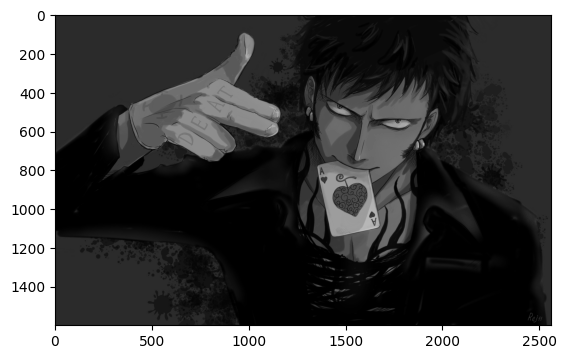

In [18]:
#Read image using opencv 
# Here 0 indicates grayscale mode
image = cv2.imread('image.jpg',0)
#check shape of input image
print(f"Shape of Input Image: {image.shape}")
#Display the input image. 
# If cmap="gray" is not used it shows image in bluish color as the default colormap for imshow is 'viridis' which is bluish so colormap gray is used
display(image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


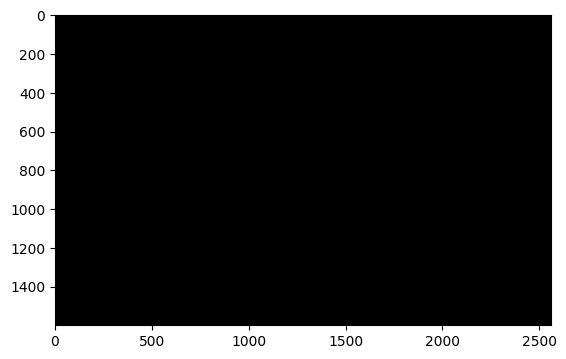

In [19]:
# new_image will store the result after some operations have been applied on the original image, so initialize it as all zeros 
new_image = np.zeros(image.shape,image.dtype)
#check new image
print(new_image)
#display new image 
display(new_image)

### For Brightness and Contrast Control
g(k) = a.f(k) + b  
where, a is gain that controls contrast and b is bias that controls brightness

In [4]:
#Choosing arbirtary values for a and b 
a = 3  #contrast control
b = 5 #brightness control

**Contrast Streching Operation**: An image processing operation to enhance the contrast of image by streching the range of pixel values

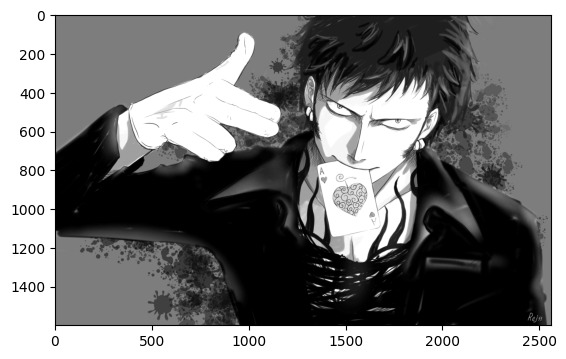

In [20]:
#performing the brightness and contrast control on original image and then storing result in the new_image 
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        # After performing the operation the result is clipped to range 0-255 which is valud range of pixel values for an 8-bit image
        new_image[y,x] = np.clip(a*image[y,x]+b,0,255)
#Displaying the new image 
display(new_image)

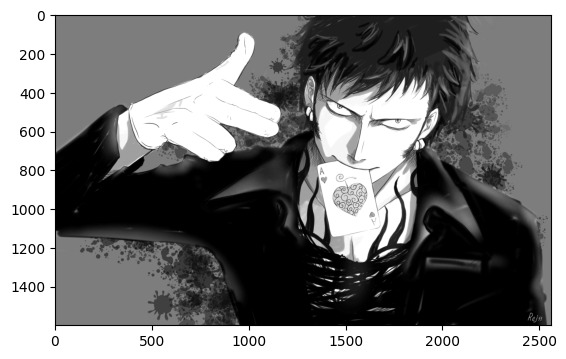

In [21]:
#Using direct method from OpenCV that provides optimized solution compared to loops for same contrast enhancement
new_image = cv2.convertScaleAbs(image,alpha=a,beta=b)
display(new_image)

### Color Enhancement for Colored Images

Shape of original colored image: (1600, 2560, 3)


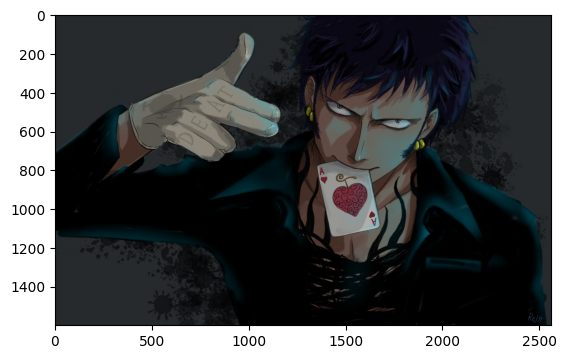

In [26]:
#Reading colored image 
# 1 is for reading colored image. This will read image with shape of (w,h,c) where w = width, h = height and c = channels = 3 for colored image so here after reading from image, we get a 3D tensor instead of a 2D matrix
color_image_original = cv2.imread("image.jpg",1)
# checking shape 
print(f"Shape of original colored image: {color_image_original.shape}")
# Displaying the original image 
plt.imshow(cv2.cvtColor(color_image_original,cv2.COLOR_BGR2RGB))
plt.show()

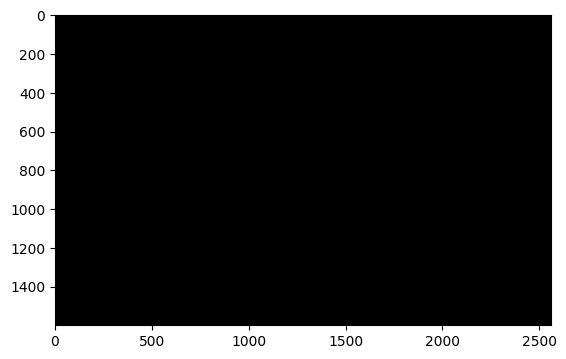

In [23]:
# creaing empty tensor for new image 
color_image_new = np.zeros(color_image_original.shape, image.dtype)
display(color_image_new)

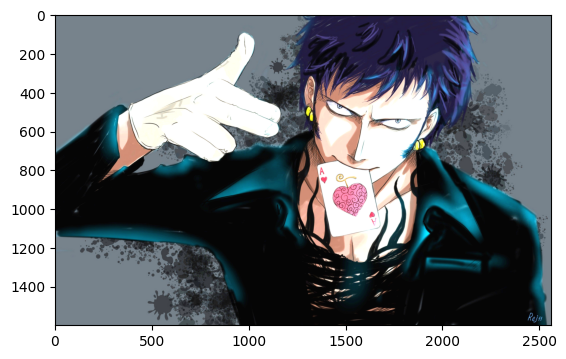

In [27]:
# Performing color enhancement using loops
for width in range(color_image_original.shape[0]):
    for height in range(color_image_original.shape[1]):
        for channels in range(color_image_original.shape[2]):
            color_image_new[width,height,channels] = np.clip(a*color_image_original[width,height,channels] + b,0,255)
# Displaying the original image 
plt.imshow(cv2.cvtColor(color_image_new,cv2.COLOR_BGR2RGB))
plt.show()

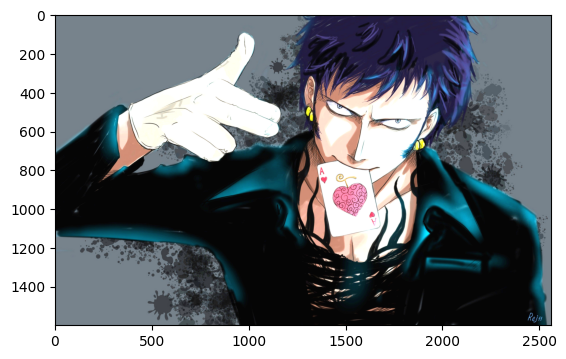

In [28]:
#same but using function from opencv 
color_image_changed = cv2.convertScaleAbs(color_image_original,alpha=a,beta=b)
# Displaying the original image 
plt.imshow(cv2.cvtColor(color_image_changed,cv2.COLOR_BGR2RGB))
plt.show()

Histogram plots for images

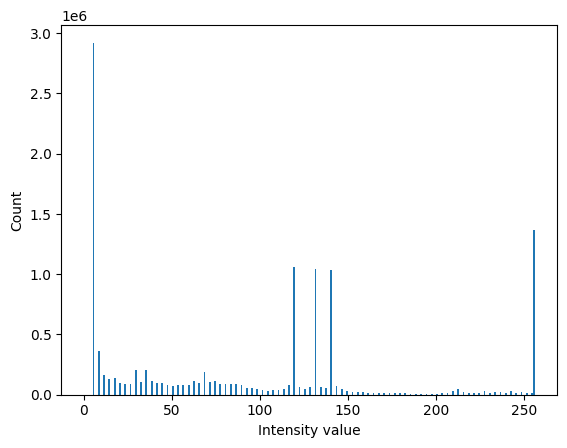

In [29]:
# For changed image
# here .ravel() flattens the colored image i-e converts from 3d array to 1D array
# also 256 is number of bins in the histogram heare each bin is for each possible pixel intensity value in an 8 bit image
# [0,256] is the range of pixel intensity values that the histogram will cover. For an 8 bit image valid range is 0 to 255 so we have used [0,256]
plt.hist(color_image_changed.ravel(),256,[0,256])
plt.xlabel("Intensity value")
plt.ylabel("Count")
plt.show()

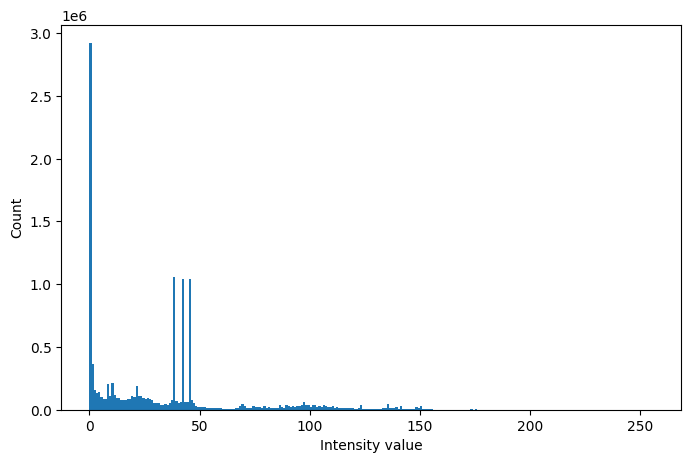

In [30]:
# For original image
plt.figure(figsize=(8,5))
plt.hist(cv2.cvtColor(color_image_original, cv2.COLOR_BGR2RGB).ravel(),256,[0,256])
plt.xlabel("Intensity value")
plt.ylabel("Count")
plt.show()

Comparing results of point operators on the image

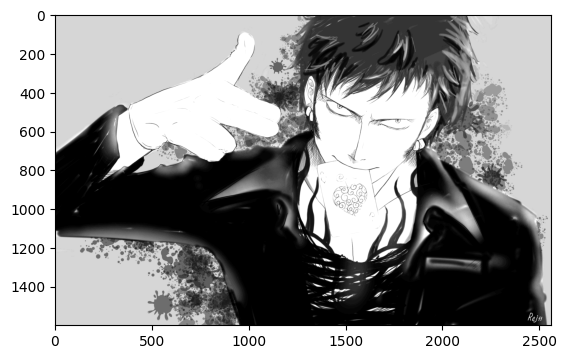

In [32]:
new_image_2 = cv2.convertScaleAbs(image,alpha=5,beta=10)
display(new_image_2)

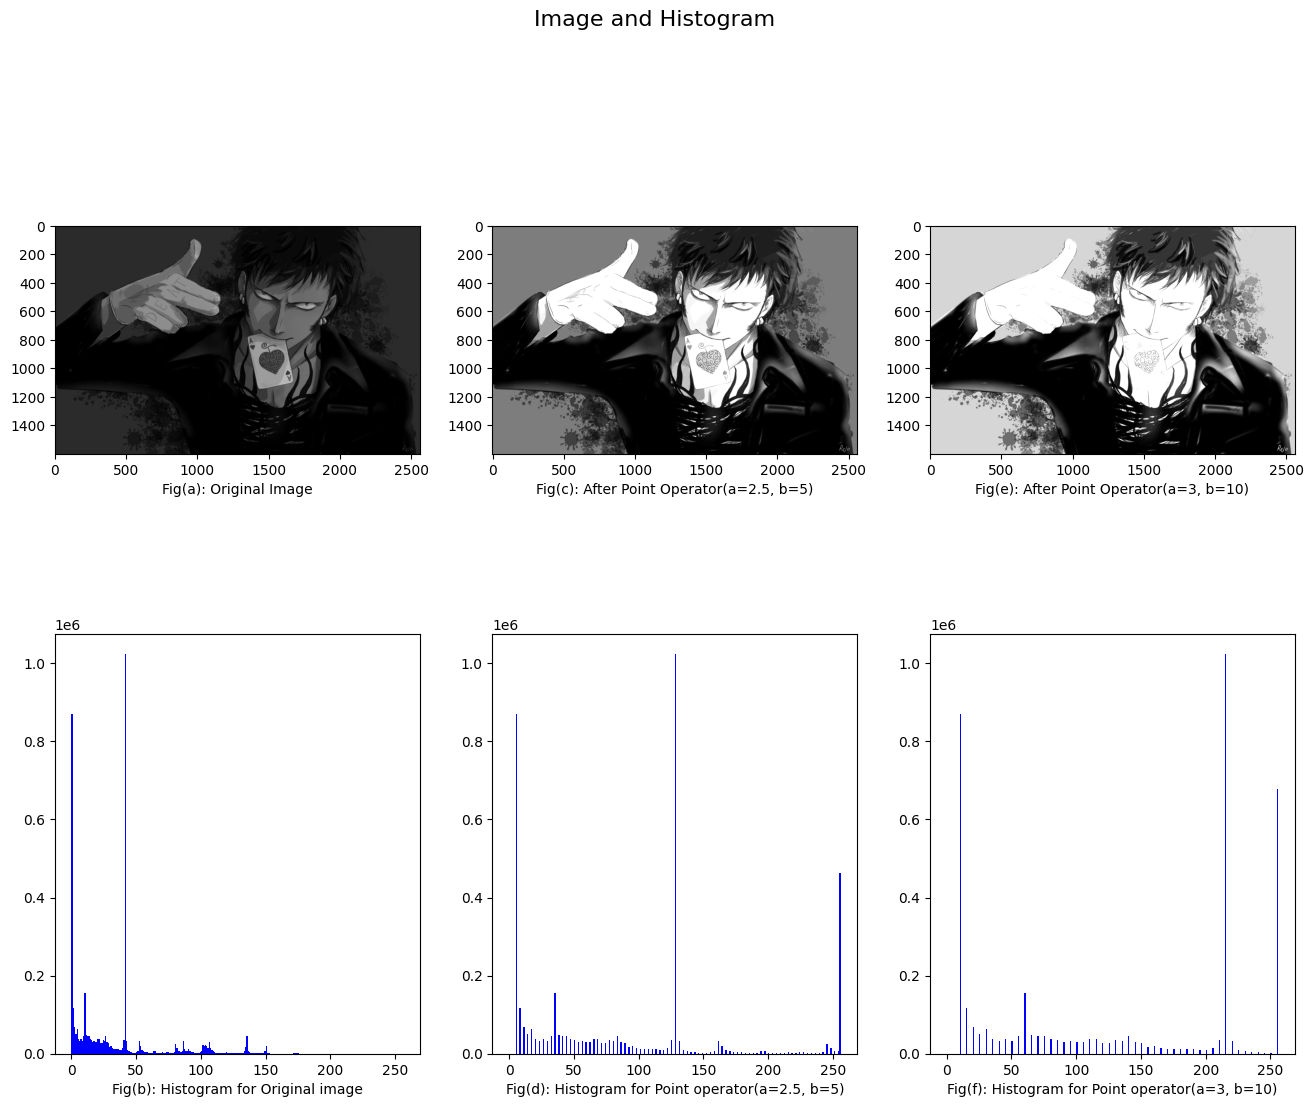

In [33]:
f, axes = plt.subplots(2, 3 , figsize=(16,12))
axes[0,0].imshow(image,cmap='gray')
axes[0,1].imshow(new_image,cmap='gray')
axes[0,2].imshow(new_image_2,cmap='gray')
axes[1,0].hist(image.flatten(),256,[0,256], color = 'blue')
axes[1,1].hist(new_image.flatten(),256,[0,256], color = 'b')
axes[1,2].hist(new_image_2.flatten(),256,[0,256], color = 'b')

plt.setp(axes[0,0], xlabel='Fig(a): Original Image')
plt.setp(axes[0,1], xlabel='Fig(c): After Point Operator(a=2.5, b=5)')
plt.setp(axes[0,2], xlabel='Fig(e): After Point Operator(a=3, b=10)')

plt.setp(axes[1,0], xlabel='Fig(b): Histogram for Original image')
plt.setp(axes[1,1], xlabel='Fig(d): Histogram for Point operator(a=2.5, b=5)')
plt.setp(axes[1,2], xlabel='Fig(f): Histogram for Point operator(a=3, b=10)')

# f.tight_layout()
f.suptitle("Image and Histogram", fontsize=16)
plt.savefig('Image hist point operator.PNG')
plt.show()
plt.close()